**Outliers Identification Using Statistical Method**

IQR



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline
# the matplotlib inline magic command is used to enable display of matplotlib plots
# directly within the notebook,rather than in a separate window

In [3]:
df_raw=pd.read_csv('creditcard.csv')
df=df_raw.drop(['Time'],axis=1)

In [4]:
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# This list contains the names of features (columns) to be used in the dataset.


In [6]:
def IQR_method(df,n,features):
  """
  Takes a dataframe and returns an index list corresponding to the observations
  containing more than n outliers according to the Tukey IQR method
  """
  outlier_list=[]

  for column in features:
    # 1st quartile (25%)
    Q1=np.percentile(df[column],25)
    # 3rd quartile (75%)
    Q3=np.percentile(df[column],75)

    # Interquartile range (IQR)
    IQR=Q3-Q1

    # outlier step
    outlier_step=1.5*IQR

    # Determining a list of indices of outliers  (filtering)
    outlier_list_column=df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index


    # appending a list of outliers
    outlier_list.extend(outlier_list_column)

  # selecting observation containing more than x outliers
  outlier_list=Counter(outlier_list)
  multiple_outliers=list(k for k,v in outlier_list.items() if v>n)

  # Calculate the number of records below and above bound value respectively
  df1=df[df[column]<Q1-outlier_step]
  df2=df[df[column]>Q3+outlier_step]

  print('Total number of outlier is : ',df1.shape[0]+df2.shape[0])

  return multiple_outliers

# detecting outliers
outliers_IQR=IQR_method(df,1,feature_list)

# dropping outliers
df_out=df.drop(outliers_IQR,axis=0).reset_index(drop=True)

Total number of outlier is :  31904


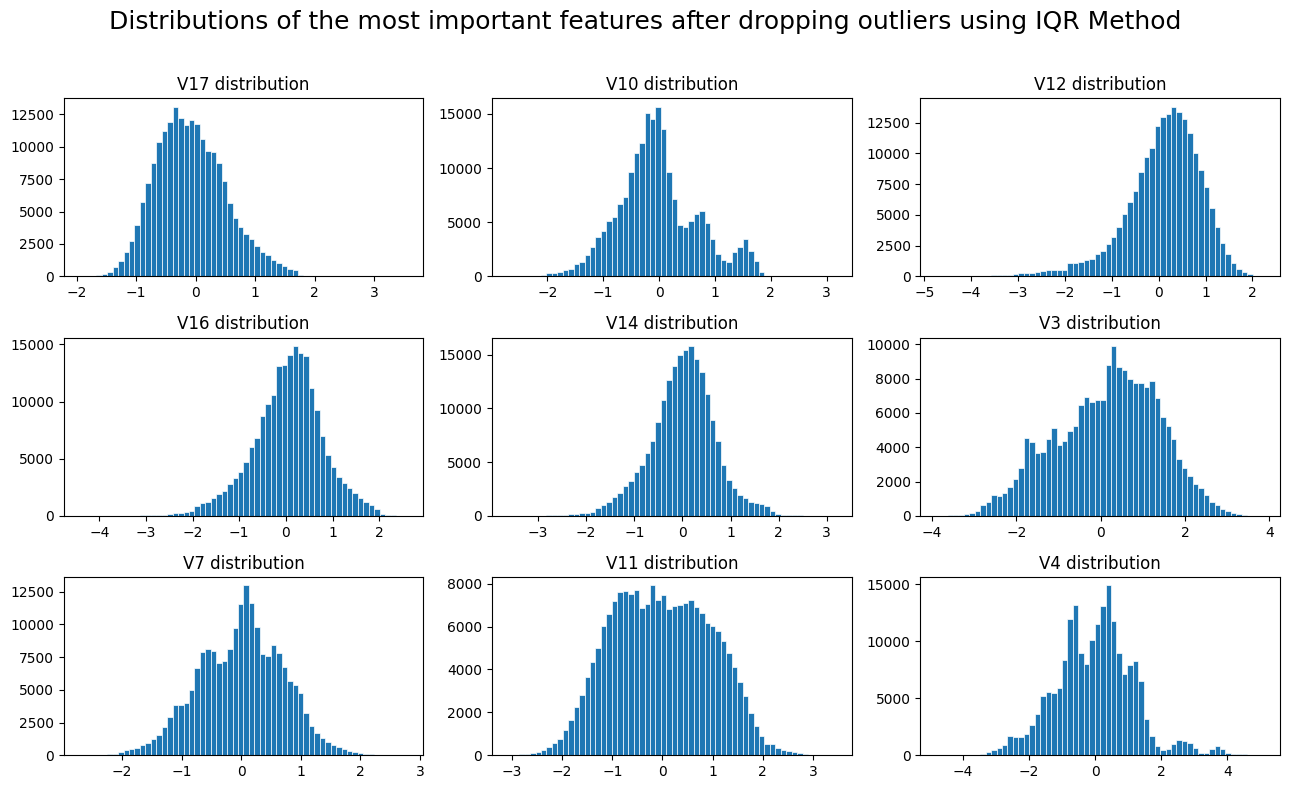

In [10]:

# Checking distributions of the most important features after dropping outliers

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(13,8))
fig.suptitle('Distributions of the most important features after dropping outliers using IQR Method\n',size=18)

axes[0,0].hist(df_out['V17'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,0].set_title('V17 distribution')

axes[0,1].hist(df_out['V10'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,1].set_title('V10 distribution')

axes[0,2].hist(df_out['V12'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,2].set_title('V12 distribution')

axes[1,0].hist(df_out['V16'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,0].set_title('V16 distribution')

axes[1,1].hist(df_out['V14'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,1].set_title('V14 distribution')

axes[1,2].hist(df_out['V3'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,2].set_title('V3 distribution')

axes[2,0].hist(df_out['V7'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,0].set_title('V7 distribution')

axes[2,1].hist(df_out['V11'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,1].set_title('V11 distribution')

axes[2,2].hist(df_out['V4'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,2].set_title('V4 distribution')

plt.tight_layout()
